In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl 
import pandas as pd
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [4]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

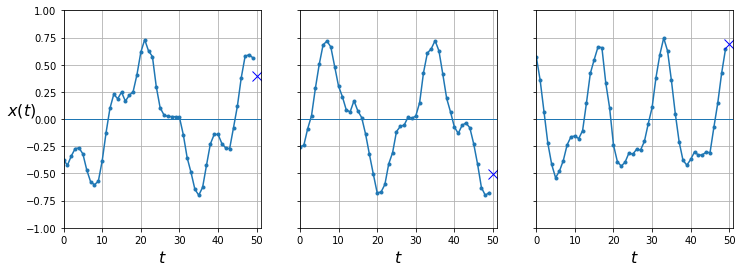

In [5]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
               y_label=("$x(t)$" if col==0 else None))
    
plt.show()

In [6]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

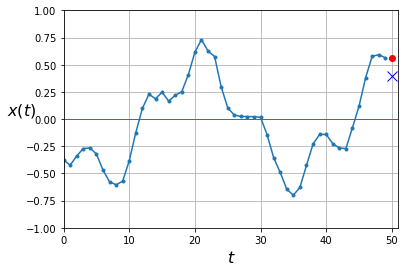

In [7]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 91us/sample - loss: 0.1008 - val_loss: 0.0552
Epoch 2/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0388 - val_loss: 0.0270
Epoch 3/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0206 - val_loss: 0.0160
Epoch 4/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0132 - val_loss: 0.0115
Epoch 5/20
7000/7000 [==============================] - 0s 28us/sample - loss: 0.0103 - val_loss: 0.0097
Epoch 6/20
7000/7000 [==============================] - 0s 28us/sample - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
7000/7000 [==============================] - 0s 28us/sample - loss: 0.0079 - val_loss: 0.0078
Epoch 8/20
7000/7000 [==============================] - 0s 28us/sample - loss: 0.0072 - val_loss: 0.0073
Epoch 9/20
7000/7000 [==============================] - 0s 28us/sample - loss: 0.0066 - val_loss: 0.0066
Epoch 1

In [9]:
model.evaluate(X_valid, y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004112337227910757

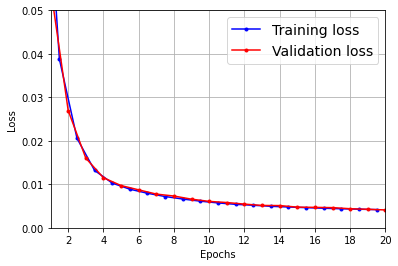

In [10]:
def plot_learning_curve(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
plot_learning_curve(history.history["loss"], history.history["val_loss"])
plt.show()

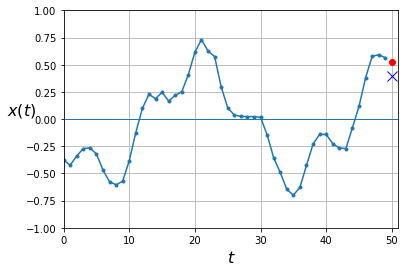

In [11]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [12]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 825us/sample - loss: 0.0323 - val_loss: 0.0131
Epoch 2/20
7000/7000 [==============================] - 5s 663us/sample - loss: 0.0118 - val_loss: 0.0110
Epoch 3/20
7000/7000 [==============================] - 5s 664us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 4/20
7000/7000 [==============================] - 5s 665us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 5/20
7000/7000 [==============================] - 5s 667us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 6/20
7000/7000 [==============================] - 5s 665us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 7/20
7000/7000 [==============================] - 5s 668us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 8/20
7000/7000 [==============================] - 5s 666us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 9/20
7000/7000 [==============================] - 5s 665us/sample - loss: 0.0114 - val_loss: 0.010

In [13]:
model.evaluate(X_valid, y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.010873271480202675

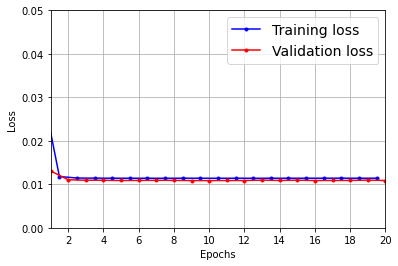

In [14]:
plot_learning_curve(history.history["loss"], history.history["val_loss"])
plt.show()

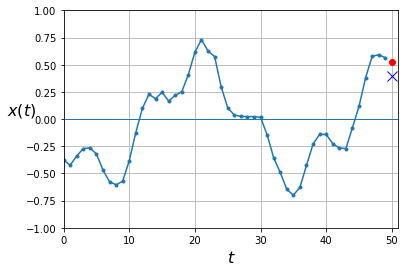

In [15]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 16s 2ms/sample - loss: 0.0802 - val_loss: 0.0095
Epoch 2/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0064 - val_loss: 0.0052
Epoch 3/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0049 - val_loss: 0.0043
Epoch 4/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0043 - val_loss: 0.0045
Epoch 5/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0040 - val_loss: 0.0033
Epoch 6/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0037 - val_loss: 0.0037
Epoch 7/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0036 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0034 - val_loss: 0.0032
Epoch 9/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0034 - val_loss: 0.0030
Epoch 1

In [19]:
model.evaluate(X_valid, y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002936474326997995

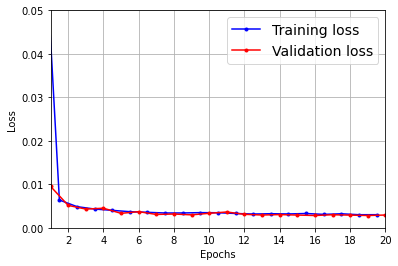

In [21]:
plot_learning_curve(history.history["loss"], history.history["val_loss"])
plt.show()

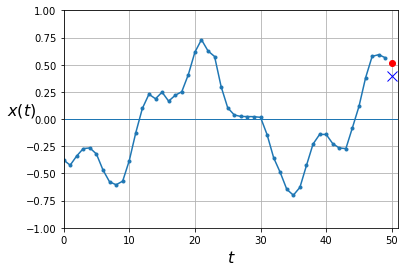

In [22]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [23]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0329 - val_loss: 0.0061
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0047 - val_loss: 0.0039
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0038 - val_loss: 0.0036
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0034 - val_loss: 0.0032
Epoch 6/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0034 - val_loss: 0.0035
Epoch 7/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0033 - val_loss: 0.0029
Epoch 8/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0032 - val_loss: 0.0035
Epoch 9/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0032 - val_loss: 0.0038
Epoch 10/20
700

In [24]:
model.evaluate(X_valid, y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027704542689025403

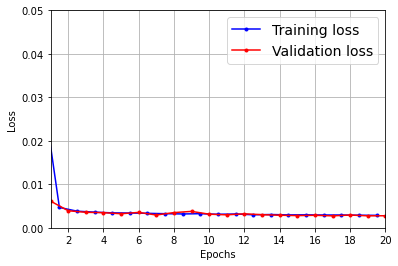

In [25]:
plot_learning_curve(history.history["loss"], history.history["val_loss"])
plt.show()

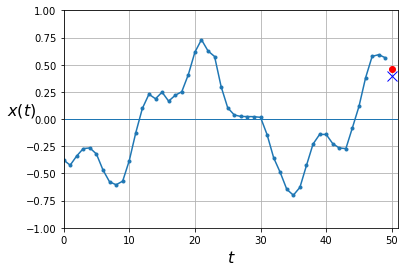

In [26]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [27]:
np.random.seed(43)
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
Y_pred = X[:, n_steps:]

In [28]:
Y_pred.shape

(1, 10, 1)

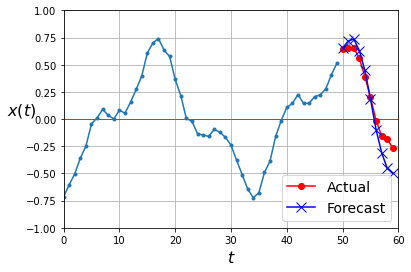

In [29]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
    
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [30]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [31]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
    
Y_pred = X[:, n_steps:, 0]

In [32]:
Y_pred.shape

(2000, 10)

In [33]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.02349955

In [36]:
Y_naive_pred = np.tile(X_valid[:, -1], 10)
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.25697407

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 72us/sample - loss: 0.1077 - val_loss: 0.0556
Epoch 2/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0450 - val_loss: 0.0379
Epoch 3/20
7000/7000 [==============================] - 0s 32us/sample - loss: 0.0343 - val_loss: 0.0316
Epoch 4/20
7000/7000 [==============================] - 0s 31us/sample - loss: 0.0298 - val_loss: 0.0283
Epoch 5/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0272 - val_loss: 0.0260
Epoch 6/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0255 - val_loss: 0.0248
Epoch 7/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0243 - val_loss: 0.0237
Epoch 8/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0234 - val_loss: 0.0232
Epoch 9/20
7000/7000 [==============================] - 0s 30us/sample - loss: 0.0227 - val_loss: 0.0222
Epoch 1

In [39]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0648 - val_loss: 0.0282
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0231 - val_loss: 0.0187
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0174 - val_loss: 0.0154
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0141 - val_loss: 0.0126
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0129 - val_loss: 0.0121
Epoch 6/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0120 - val_loss: 0.0113
Epoch 7/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0113 - val_loss: 0.0103
Epoch 8/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0109 - val_loss: 0.0103
Epoch 9/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0104 - val_loss: 0.0096
Epoch 10/20
700

In [40]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

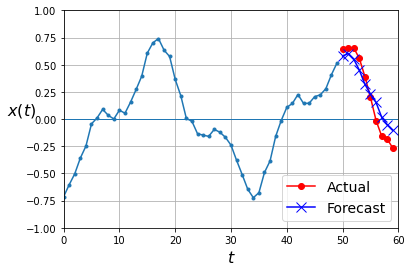

In [41]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [42]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
    
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [43]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0502 - last_time_step_mse: 0.0392 - val_loss: 0.0422 - val_last_time_step_mse: 0.0309
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0403 - last_time_step_mse: 0.0293 - val_loss: 0.0361 - val_last_time_step_mse: 0.0275
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0409 - last_time_step_mse: 0.0343 - val_loss: 0.0394 - val_last_time_step_mse: 0.0325
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0385 - last_time_step_mse: 0.0305 - val_loss: 0.0341 - val_last_time_step_mse: 0.0264
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0324 - last_time_step_mse: 0.0228 - val_loss: 0.0302 - val_last_time_step_mse: 0.0193
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0293 - last_time_step_mse: 0.0188 - 

In [45]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

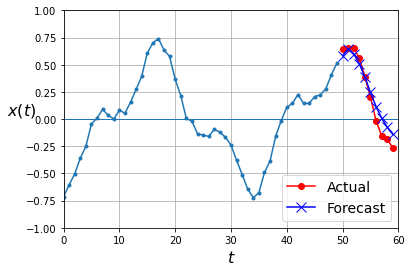

In [46]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True), 
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.1935 - last_time_step_mse: 0.1917 - val_loss: 0.0902 - val_last_time_step_mse: 0.0864
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0535 - last_time_step_mse: 0.0447 - val_loss: 0.0556 - val_last_time_step_mse: 0.0468
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0470 - last_time_step_mse: 0.0374 - val_loss: 0.0453 - val_last_time_step_mse: 0.0357
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0436 - last_time_step_mse: 0.0335 - val_loss: 0.0417 - val_last_time_step_mse: 0.0320
Epoch 5/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0408 - last_time_step_mse: 0.0304 - val_loss: 0.0405 - val_last_time_step_mse: 0.0301
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0385 - last_time_step_mse: 0.0277 - 

In [48]:
from tensorflow.keras.layers import LayerNormalization

In [50]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 27s 4ms/sample - loss: 0.1605 - last_time_step_mse: 0.1562 - val_loss: 0.0727 - val_last_time_step_mse: 0.0649
Epoch 2/20
7000/7000 [==============================] - 24s 3ms/sample - loss: 0.0637 - last_time_step_mse: 0.0523 - val_loss: 0.0579 - val_last_time_step_mse: 0.0445
Epoch 3/20
7000/7000 [==============================] - 23s 3ms/sample - loss: 0.0548 - last_time_step_mse: 0.0420 - val_loss: 0.0517 - val_last_time_step_mse: 0.0386
Epoch 4/20
7000/7000 [==============================] - 23s 3ms/sample - loss: 0.0487 - last_time_step_mse: 0.0361 - val_loss: 0.0458 - val_last_time_step_mse: 0.0334
Epoch 5/20
7000/7000 [==============================] - 23s 3ms/sample - loss: 0.0432 - last_time_step_mse: 0.0313 - val_loss: 0.0411 - val_last_time_step_mse: 0.0302
Epoch 6/20
7000/7000 [==============================] - 23s 3ms/sample - loss: 0.0395 - last_time_step_mse: 0.0281 - 

In [52]:
class MyRNN(keras.layers.Layer):
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.cell = cell
        self.return_sequences = return_sequences
        self.get_initial_state = getattr(self.cell, "get_initial_state", self.fallback_initial_state)
    def fallback_initial_state(self, inputs):
        return [tf.zeros([self.cell.state_size], dtype=inputs.dtype)]
    @tf.function
    def call(self, inputs):
        states = self.get_initial_state(inputs)
        n_steps = tf.shape(inputs)[1]
        if self.return_sequences:
            sequences = tf.TensorArray(inputs.dtype, size=n_steps)
        outputs = tf.zeros(shape=[n_steps, self.cell.output_size], dtype=inputs.dtype)
        for step in tf.range(n_steps):
            outputs, states = self.cell(inputs[:, step], states)
            if self.return_sequences:
                sequences = sequences.write(step, outputs)
        if self.return_sequences:
            return sequences.stack()
        else:
            return outputs

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    MyRNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    MyRNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 26s 4ms/sample - loss: 0.2323 - last_time_step_mse: 0.2167 - val_loss: 0.0925 - val_last_time_step_mse: 0.0833
Epoch 2/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0759 - last_time_step_mse: 0.0636 - val_loss: 0.0657 - val_last_time_step_mse: 0.0534
Epoch 3/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0609 - last_time_step_mse: 0.0480 - val_loss: 0.0578 - val_last_time_step_mse: 0.0455
Epoch 4/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0548 - last_time_step_mse: 0.0423 - val_loss: 0.0525 - val_last_time_step_mse: 0.0393
Epoch 5/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0503 - last_time_step_mse: 0.0378 - val_loss: 0.0486 - val_last_time_step_mse: 0.0356
Epoch 6/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0466 - last_time_step_mse: 0.0341 - 

In [55]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 26s 4ms/sample - loss: 0.0774 - last_time_step_mse: 0.0628 - val_loss: 0.0536 - val_last_time_step_mse: 0.0320
Epoch 2/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.0457 - last_time_step_mse: 0.0230 - val_loss: 0.0410 - val_last_time_step_mse: 0.0195
Epoch 3/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.0376 - last_time_step_mse: 0.0158 - val_loss: 0.0352 - val_last_time_step_mse: 0.0139
Epoch 4/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.0339 - last_time_step_mse: 0.0139 - val_loss: 0.0325 - val_last_time_step_mse: 0.0131
Epoch 5/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.0317 - last_time_step_mse: 0.0128 - val_loss: 0.0309 - val_last_time_step_mse: 0.0125
Epoch 6/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.0300 - last_time_step_mse: 0.0117 - 

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=[X_valid, Y_valid])

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 27s 4ms/sample - loss: 0.0745 - last_time_step_mse: 0.0668 - val_loss: 0.0526 - val_last_time_step_mse: 0.0413
Epoch 2/20
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.0478 - last_time_step_mse: 0.0369 - val_loss: 0.0441 - val_last_time_step_mse: 0.0326
Epoch 3/20
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.0420 - last_time_step_mse: 0.0306 - val_loss: 0.0395 - val_last_time_step_mse: 0.0275
Epoch 4/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0375 - last_time_step_mse: 0.0250 - val_loss: 0.0346 - val_last_time_step_mse: 0.0205
Epoch 5/20
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.0327 - last_time_step_mse: 0.0178 - val_loss: 0.0311 - val_last_time_step_mse: 0.0156
Epoch 6/20
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.0309 - last_time_step_mse: 0.0157 - 

In [57]:
model.evaluate(X_valid, Y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.02402710248529911, 0.010358049]

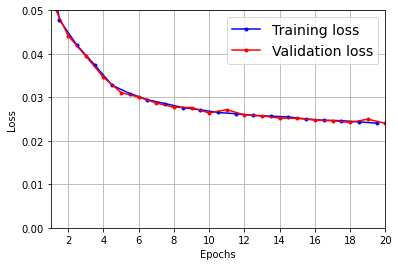

In [58]:
plot_learning_curvening_curve(history.history["loss"], history.history["val_loss"])
plt.show()

In [59]:
np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

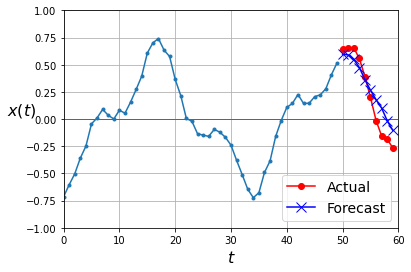

In [60]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()